## Übung 1.1

### 1.1.1

#### Ausführung von Ping zu unterschiedlichen Hosts

Zu den unterschiedlichen Hosts wird jeweils n-mal ein Ping durchgeführt und die Ausgabe in ein Tupel mit dem dazugehörigen Hostnamen gespeichert.

In [1]:
import subprocess

hosts = ('uni-due.de', 'whitehouse.gov', 'icmp.org')
log = []
for host in hosts:
    process = subprocess.Popen(['ping', '-c', "50", host], stdout=subprocess.PIPE)
    for line in process.stdout:
        # die zeile ist ein raw string, muss also dekodiert werden
        line = line.decode('utf-8')
        # in der zeile ist bereits ein zeilenumbruch vorhanden
        print(line, end='')
        log.append((host, line))

PING uni-due.de (132.252.185.170) 56(84) bytes of data.
64 bytes from uni-due.de (132.252.185.170): icmp_seq=1 ttl=120 time=19.6 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=2 ttl=120 time=20.9 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=3 ttl=120 time=19.7 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=4 ttl=120 time=19.7 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=5 ttl=120 time=19.7 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=6 ttl=120 time=20.0 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=7 ttl=120 time=22.8 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=8 ttl=120 time=19.6 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=9 ttl=120 time=19.9 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=10 ttl=120 time=20.1 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=11 ttl=120 time=19.8 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=12 ttl=120 time=21.6 ms
64 bytes from uni-due.de (132

#### Parsen der Rohdaten

Die Angabe der Round trip time ist gegeben durch z.B. den Text `time=166 ms`. Dieser kann durch einen regulären Ausdruck aus einer Zeile gefiltert werden.

In [2]:
import re

data = []
for host, line in log:
    # Der regulaere Ausdruck findet Zeitangaben (time=) bei Bedarf durch . getrennt
    m = re.search('time=(\d+(\.\d+)?)', line)
    if m:
        groups = m.groups()
        time = float(groups[0])
        data.append((host, time))
print(data)

[('uni-due.de', 19.6), ('uni-due.de', 20.9), ('uni-due.de', 19.7), ('uni-due.de', 19.7), ('uni-due.de', 19.7), ('uni-due.de', 20.0), ('uni-due.de', 22.8), ('uni-due.de', 19.6), ('uni-due.de', 19.9), ('uni-due.de', 20.1), ('uni-due.de', 19.8), ('uni-due.de', 21.6), ('uni-due.de', 19.7), ('uni-due.de', 19.3), ('uni-due.de', 20.6), ('uni-due.de', 19.8), ('uni-due.de', 19.7), ('uni-due.de', 19.1), ('uni-due.de', 19.3), ('uni-due.de', 19.3), ('uni-due.de', 19.5), ('uni-due.de', 19.8), ('uni-due.de', 19.8), ('uni-due.de', 19.5), ('uni-due.de', 19.7), ('uni-due.de', 19.7), ('uni-due.de', 19.6), ('uni-due.de', 20.6), ('uni-due.de', 20.1), ('uni-due.de', 20.1), ('uni-due.de', 19.6), ('uni-due.de', 19.4), ('uni-due.de', 21.1), ('uni-due.de', 20.5), ('uni-due.de', 26.8), ('uni-due.de', 19.8), ('uni-due.de', 19.4), ('uni-due.de', 19.4), ('uni-due.de', 19.5), ('uni-due.de', 20.2), ('uni-due.de', 19.1), ('uni-due.de', 19.8), ('uni-due.de', 19.5), ('uni-due.de', 19.3), ('uni-due.de', 19.6), ('uni-due

#### Statistiken zum Ping

In der Aufgabenstellung war z.B. nach dem Mittelwert und der Varianz gefragt. Gerade bei der Varianz ergaben sich Schwierigkeiten. 

Wikipedia:

> Sie beschreibt die erwartete quadratische Abweichung der Zufallsvariablen von ihrem Erwartungswert.

Zum Erwartungswert ist eine entsprechende Quellenangabe vorhanden. Ansonsten ist folgendes Video zu empfehlen:
[Zufallsgröße, Erwartungswert, Faires Spiel, ...](https://www.youtube.com/watch?v=7zJ3GYBVU6Q)

Da im Beispiel alle Möglichkeiten und deren Wahrscheinlichkeit bekannt sind kann der Erwartungswert einfach bestimmt werden: $\sum_{i \in I} x_i P(X = x_i)$

Da hier aber nicht von bekannten möglichen Werten ausgegangen wird ist eine [unkorrigierte Stichprobenvarianz](https://de.wikipedia.org/wiki/Stichprobenvarianz) das Mittel der Wahl.

$s^2 = \frac{1}{n - 1} \sum_{i = 1}^n (x_i - \overline{x})^2$

In [3]:
import itertools
import numpy

# Die zu gruppierenden Daten muessen zunaechst nach demselben Schluessel
# sortiert werden, siehe http://stackoverflow.com/questions/773/how-do-i-use-pythons-itertools-groupby
data = sorted(data, key=lambda t: t[0])
for host, g in itertools.groupby(data, key=lambda t: t[0]):

    rtt = [e[1] for e in g]
    max_rtt = max(rtt)
    min_rtt = min(rtt)
    
    # alternativer durchschnitt: sum(rtt) / len(rtt)
    # aber achtung vor rundungsfehlern!
    mean_rtt = numpy.mean(rtt) 
    
    # zur varianzberechnung siehe 
    # http://www.frustfrei-lernen.de/mathematik/varianz-berechnen.html
    variance = 1 / (len(rtt) - 1) * sum([numpy.power(x - mean_rtt, 2) for x in rtt])
    
    # die standardvarianz ist die wurzel der varianz
    std_deviation = numpy.sqrt(variance)
    
    print('              Host: %s' % host)
    print('           Max RTT: %f' % max_rtt)
    print('           Min RTT: %f' % min_rtt)
    print('  Durchschnitt RTT: %f' % mean_rtt)
    print('           Varianz: %f' % variance)
    print('Standardabweichung: %f' % std_deviation)
    print()

              Host: icmp.org
           Max RTT: 286.000000
           Min RTT: 184.000000
  Durchschnitt RTT: 198.166667
           Varianz: 403.503546
Standardabweichung: 20.087398

              Host: uni-due.de
           Max RTT: 26.800000
           Min RTT: 19.100000
  Durchschnitt RTT: 20.002000
           Varianz: 1.381424
Standardabweichung: 1.175340

              Host: whitehouse.gov
           Max RTT: 22.100000
           Min RTT: 12.800000
  Durchschnitt RTT: 14.052000
           Varianz: 2.681322
Standardabweichung: 1.637474



#### Anzeige eines Histograms

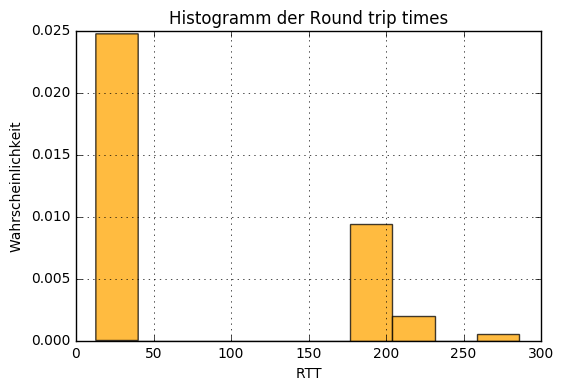

In [4]:
import matplotlib.pyplot as plt

times = [e[1] for e in data]
plt.hist(times, 10, normed=1, facecolor='orange', alpha=0.75)

plt.xlabel('RTT')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Histogramm der Round trip times')
plt.grid(True)
plt.show()

#### CDF

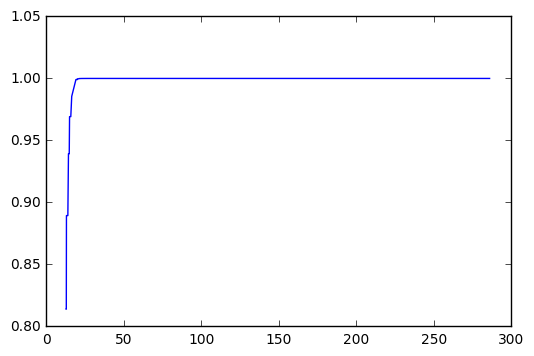

In [5]:
import scipy.stats as stats

times = sorted(times)
plt.plot(times, stats.binom.cdf(times, 50, 0.2))
plt.show()

### 1.1.2

Es sollte simuliert werden wie die Gesamtverlustwahrscheinlichkeit bei einer zweiteiligen Strecke mit jeweils Teilverlustwahrscheinlichkeiten von $p_{ab} = 1\%$ und $p_{bc} = 2\%$ sind. Über einen Ereignisbaum kann man sich das ganz gut bildlich vorstellen.

Insgesamt bestehen $100^2$ Möglichkeiten. Bei einer von 100 Möglichkeiten geht das Paket auf der ersten Teilstrecke verloren. Nach jeder dieser 100 Möglichkeiten gibt es noch einmal 100 Möglichkeiten in denen das Paket verloren gehen kann. Am ersten Baum gibt es eine Möglichkeit des Paketverlustes. Daraus folgen für die Gesamtverlustwahrscheinlichkeit 100 Fehlschläge. Für jede andere der 99 Möglichkeiten gibt es 2 Möglichkeiten in denen das Paket widerum verloren gehen kann.

Demzufolge ist die Gesamtwahrscheinlichkeit die Wahrscheinlichkeit der ersten Strecke (0.01) plus die Wahrscheinlichkeit der zweiten Strecke (0.02) minus der Anteil der auf der ersten Strecke eh schon in die Hose geht.

Siehe: http://www.mathematik-wissen.de/mehrstufige_zufallsexperimente.htm

Bei n Teilstrecken beträgt also die Gesamtverlustwahrscheinlichkeit immer die Teilverlustwahrscheinlichkeit des Vorgängers + diese Teilverlustwahrscheinlichkeit * (1 - Teilverlustwahrscheinlichkeit des Vorgängers)

$P(X) = \sum_{i = 1}^{n} P(x_{i}) * 1 - P(x_{i - 1})$

wobei gilt $P(0) = P(0)$

In [6]:
import random

iterations = (100, 1000, 10000, 1000000)
loss_ab = 0.01
loss_bc = 0.02

for i in iterations:
    # 0 <= random.random() < 1
    # 1 fuer pakete, die erfolgreich sind, 2 fuer fehlschlaege
    # filterung a -> b
    pakets = [1 if random.random() >= loss_ab else 0 for x in range(0, i)]
    # filterung b -> c
    pakets = [1 if random.random() >= loss_bc and p else 0 for p in pakets]
    
    print('Verlust: {:3.4f}% bei {:8d} Paketen'.format((1 - float(sum(pakets)) / i) * 100, i))
    
print('\nBei einem kalkulierten Verlust von: {:3.4f}%'.format((0.01 + 0.02 * (1 - 0.01)) * 100))
    

Verlust: 3.0000% bei      100 Paketen
Verlust: 3.0000% bei     1000 Paketen
Verlust: 2.9500% bei    10000 Paketen
Verlust: 2.9622% bei  1000000 Paketen

Bei einem kalkulierten Verlust von: 2.9800%


Sollten n beliebige Strecken mit gegebenen Verlustwahrscheinlichkeiten gegeben sein, kann die folgende Methode verwendet werden:

In [4]:
def loss(p_i):
    p_i = list(p_i)
    if len(p_i) < 2:
        return p_i[0]
    
    _p = []
    # P(0) hinzufuegen
    _p.append(p_i[0])
    
    for i in range(1, len(p_i)):
        # alle anderen wahrscheinlichkeiten basieren auch auf dem vorgaenger
        _p.append(p_i[i] * (1 - sum(_p)))
        
    return sum(_p)

print(loss((0.01, 0.02)))
print(loss((0.5, 0.4, 0.3, 0.2)))

0.0298
0.832
